## **Upload Dataset & Perform Exploratory Data Analysis**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving enhanced_health_insurance_claims.csv to enhanced_health_insurance_claims (2).csv


In [ ]:
import pandas as pd

# Replace with your file name
df = pd.read_csv("enhanced_health_insurance_claims.csv")

# View first 5 rows
df.head()


,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone


In [ ]:
# Shape of dataset
print("Rows & Columns:", df.shape)

# Columns info
print(df.info())

# Summary stats
print(df.describe())

# Missing values
print(df.isnull().sum())


Rows & Columns: (4500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClaimID                  4500 non-null   object 
 1   PatientID                4500 non-null   object 
 2   ProviderID               4500 non-null   object 
 3   ClaimAmount              4500 non-null   float64
 4   ClaimDate                4500 non-null   object 
 5   DiagnosisCode            4500 non-null   object 
 6   ProcedureCode            4500 non-null   object 
 7   PatientAge               4500 non-null   int64  
 8   PatientGender            4500 non-null   object 
 9   ProviderSpecialty        4500 non-null   object 
 10  ClaimStatus              4500 non-null   object 
 11  PatientIncome            4500 non-null   float64
 12  PatientMaritalStatus     4500 non-null   object 
 13  PatientEmploymentStatus  4500 non-null   object 
 1

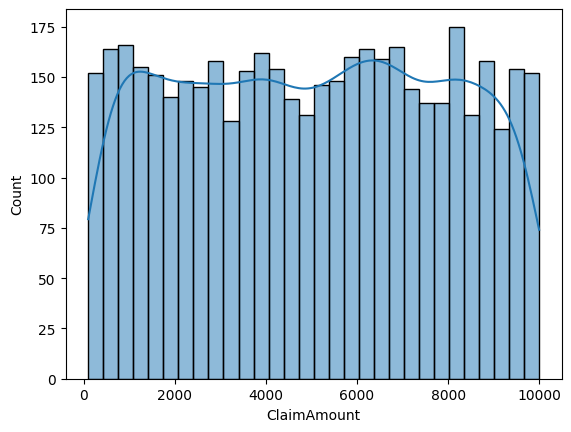

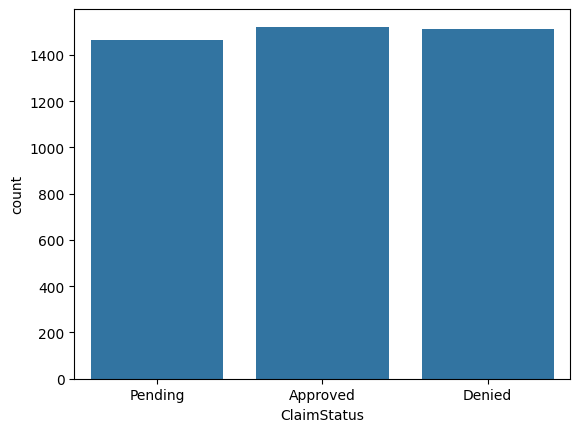

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Claim Amount Distribution
sns.histplot(df['ClaimAmount'], bins=30, kde=True)
plt.show()

# Example: Claim Status Count
sns.countplot(x='ClaimStatus', data=df)
plt.show()


**Data PreProcessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Fill numeric missing values with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode (most common)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop('ClaimStatus', axis=1)   # Features (inputs)
y = df['ClaimStatus']                # Target (output)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.31666666666666665

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.33      0.34       318
           1       0.29      0.43      0.35       282
           2       0.30      0.20      0.24       300

    accuracy                           0.32       900
   macro avg       0.32      0.32      0.31       900
weighted avg       0.32      0.32      0.31       900


Confusion Matrix:
 [[105 143  70]
 [ 93 121  68]
 [ 94 147  59]]


In [ ]:
# Step 9: Try Other Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


Random Forest Accuracy: 0.3288888888888889
Decision Tree Accuracy: 0.33555555555555555
SVM Accuracy: 0.33444444444444443
